# BAFU dataset extraction

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the NAWA dataset. They present indeed different time-resolutions so not necessarly daily and hourly, but in different campaings. 

The output is one file per catchemnt (similar to the CAMELS_CH), with 44 columns:

column_name_mapping = {
    "DOC": "doc(mg/l)",
    "Nitrat-Stickstoff": "nitrate_nitrogen(mgN/l)",
    "Elektrische Leitfähigkeit": "electrical_conductivity(µS/cm)",
    "Nitrit-Stickstoff": "nitrite_nitrogen(mgN/l)",
    "ortho-Phosphat-Phosphor (filtriert)": "ortho_phosphate_phosphorus_filtered(mg/l)",
    "Ammonium-Stickstoff": "ammonium_nitrogen(mgN/l)",
    "pH-Wert": "ph()",
    "Wassertemperatur": "temperature(°C)",
    "Abfluss Tagesmaximum": "daily_maximum_discharge(m3/s)",
    "Gesamtstickstoff (unfiltriert)": "total_nitrogen_unfiltered(mg/l)",
    "Abfluss Tagesmittel": "daily_mean_discharge(m3/s)",
    "Sauerstoff": "oxygen(mg/l)",
    "Chlorid": "chloride(mg/l)",
    "Gesamtphosphor (unfiltriert)": "total_phosphorus_unfiltered(mg/l)",
    "Abfluss Tagesminimum": "daily_minimum_discharge(m3/s)",
    "Nitrit": "nitrite(mg/l)",
    "Ammonium": "ammonium(mg/l)",
    "Nitrat": "nitrate(mg/l)",
    "ortho-Phosphat": "ortho_phosphate(mg/l)",
    "Abfluss": "discharge(m3/s)",
    "Sauerstoff-Sättigung": "oxygen_saturation(%)",
    "Trübung": "turbidity(NTU)",
    "Bromid": "bromide(mg/l)",
    "Fluorid": "fluoride(mg/l)",
    "Sulfat": "sulfate(mg/l)",
    "MTBE": "methyl_tertiary_butyl_ether(µg/l)",
    "ETBE": "ethyl_tertiary_butyl_ether(µg/l)",
    "Tetrahydrofuran": "tetrahydrofuran(µg/l)",
    "1,4-Dioxan": "1_4_dioxane(µg/l)",
    "Hexachlorethan": "hexachloroethane(µg/l)",
    "1,1,1-Trichlorethan": "1_1_1_trichloroethane(µg/l)",
    "Tetrachlormethan": "carbon_tetrachloride(µg/l)",
    "Hexachlorbutadien": "hexachlorobutadiene(µg/l)",
    "Trichlorethen": "trichloroethene(µg/l)",
    "Trichlorfluormethan": "trichlorofluoromethane(µg/l)",
    "Tribrommethan": "tribromomethane(µg/l)",
    "1,3,5-Trichlorbenzol": "1_3_5_trichlorobenzene(µg/l)",
    "1,2,4-Trichlorbenzol": "1_2_4_trichlorobenzene(µg/l)",
    "1,2,3-Trichlorbenzol": "1_2_3_trichlorobenzene(µg/l)",
    "1,1-Dichlorethen": "1_1_dichloroethene(µg/l)",
    "Trichlormethan": "chloroform(µg/l)",
    "trans-1,3-Dichlorpropen": "trans_1_3_dichloropropene(µg/l)",
    "1,1,2,2-Tetrachlorethan": "1_1_2_2_tetrachloroethane(µg/l)",
    "Dichlormethan": "dichloromethane(µg/l)",
    "1,2-Dichlorethan": "1_2_dichloroethane(µg/l)",
    "1,2-Dichlorpropan": "1_2_dichloropropane(µg/l)",
    "Bromdichlormethan": "bromodichloromethane(µg/l)",
    "cis-1,3-Dichlorpropen": "cis_1_3_dichloropropene(µg/l)",
    "1,1,2-Trichlorethan": "1_1_2_trichloroethane(µg/l)",
    "Dibromchlormethan": "dibromochloromethane(µg/l)",
    "1,3-Dichlorbenzol": "1_3_dichlorobenzene(µg/l)",
    "1,4-Dichlorbenzol": "1_4_dichlorobenzene(µg/l)",
    "1,2-Dichlorbenzol": "1_2_dichlorobenzene(µg/l)",
    "Tetrachlorethen": "tetrachloroethene(µg/l)",
    "trans-1,2-Dichlorethen": "trans_1_2_dichloroethene(µg/l)",
    "1,1-Dichlorethan": "1_1_dichloroethane(µg/l)",
    "Arsen (gelöst)": "arsenic_dissolved(µg/l)",
    "Cr- gelöst": "chromium_dissolved(µg/l)",
    "Pb-gel.": "lead_dissolved(µg/l)",
    "Cadmium (gelöst)": "cadmium_dissolved(µg/l)",
    "Hg-gel.": "mercury_dissolved(µg/l)",
    "TOC": "total_organic_carbon(mg/l)",
    "BTEX (total)": "btex_total(µg/l)",
    "Halogenkohlenwasserstoffe": "halogenated_hydrocarbons(µg/l)",
    "TAME": "tertiary_amyl_methyl_ether(µg/l)",
    "1,2,3-Trimethylbenzol": "1_2_3_trimethylbenzene(µg/l)",
    "1,2,4-Trimethylbenzol": "1_2_4_trimethylbenzene(µg/l)",
    "1,3,5-Trimethylbenzol": "1_3_5_trimethylbenzene(µg/l)",
    "o-Xylol": "o_xylene(µg/l)",
    "m/p-Xylol": "m_p_xylene(µg/l)",
    "Ethylbenzol": "ethylbenzene(µg/l)",
    "Toluol": "toluene(µg/l)",
    "Benzol": "benzene(µg/l)",
    "Chlorbenzol": "chlorobenzene(µg/l)",
    "Diglyme": "diglyme(µg/l)",
    "Koffein": "caffeine(µg/l)",
    "Surfynol": "surfynol(µg/l)",
    "1,3-Dimethylaprobarbital": "1_3_dimethylaprobarbital(µg/l)",
    "Crotetamid": "crotetamide(µg/l)",
    "Crotamiton": "crotamiton(µg/l)",
    "Cropropamid": "cropropamide(µg/l)",
    "Sr- gelöst": "strontium_dissolved(µg/l)",
    "Ba- gelöst": "barium_dissolved(µg/l)",
    "B- gelöst": "boron_dissolved(µg/l)",
    "Kupfer (gelöst)": "copper_dissolved(µg/l)",
    "Zn-gel.": "zinc_dissolved(µg/l)",
    "Nickel (gelöst)": "nickel_dissolved(µg/l)",
    "cis-1,2-Dichlorethen": "cis_1_2_dichloroethene(µg/l)",
    "Lufttemperatur": "air_temperature(°C)",
    "TFA": "trifluoroacetic_acid(µg/l)",
    "Wasserstand": "water_level(mu.M.)",
    "BSB5": "bod5(mg/l)",
    "Schwebstoffe": "suspended_solids(mg/l)",
    "Gesamtphosphor (filtriert)": "total_phosphorus_filtered(mg/l)",
    "Al- gelöst": "aluminum_dissolved(µg/l)",
    "Ag gel.": "silver_dissolved(µg/l)",
    "Co- gelöst": "cobalt_dissolved(µg/l)",
    "Zinn (gelöst)": "tin_dissolved(µg/l)",
    "Eisen (gelöst)": "iron_dissolved(µg/l)",
    "Mangan (gelöst)": "manganese_dissolved(µg/l)",
    "Molybdän gelöst": "molybdenum_dissolved(µg/l)",
    "Se- gelöst": "selenium_dissolved(µg/l)",
    "Titan (gelöst)": "titanium_dissolved(µg/l)",
    "Uran gel.": "uranium_dissolved(µg/l)",
    "Calcium": "calcium(mg/l)",
    "Magnesium": "magnesium(mg/l)",
    "Kalium": "potassium(mg/l)",
    "Natrium": "sodium(mg/l)",
    "SiO2": "silicon_dioxide(mg/l)",
    "Karbonathärte": "carbonate_hardness(mmol/l)"
}


## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings
import re

c:\Users\nascimth\AppData\Local\miniconda3\envs\geopandas\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/interval_samples/"

# Set the directory:
os.chdir(PATH)

# Import data
* FULL dataset

In [4]:
# Full dataset of interval (time-series)
dataset_nawa = pd.read_excel(r"data/NAWA/nawa_data_neu_v5.xlsx")
dataset_nawa

,nawa_id,date,ammonium_nitrogen,chloride,discharge_daily_maximum_field,discharge_daily_minimum_field,discharge_daily_mean_lab,discharge_timeserie,DOC,electrical_conductivity_lab,...,nitrite_nitrogen,DRP_phosphorus,pH_lab,pH_timeserie,oxygen_lab,oxygen_timeserie,oxygen_saturation_timeserie,turbidity_timeserie,temperature_lab,temperature_timeserie
0,1017,2011-01-19 07:58:00,0.015,12.3,NaN,NaN,4.57,4.396063,1.77,440.0,...,0.01,0.011,8.6,NaN,12.0,NaN,NaN,NaN,4.5,4.310
1,1017,2011-02-16 07:20:00,0.02,11,NaN,NaN,2.93,2.910777,2.23,404.0,...,0.018,0.008,8.4,NaN,11.9,NaN,NaN,NaN,4.2,4.160
2,1017,2011-03-16 07:11:00,0.02,7.91,NaN,NaN,4.96,4.851428,2.68,341.0,...,0.01,0.006,8.4,NaN,10.3,NaN,NaN,NaN,6.9,6.706
3,1017,2011-04-19 07:38:00,0.022,8.47,NaN,NaN,3.25,3.233752,2.2,328.0,...,0.009,0.007,8.2,NaN,9.9,NaN,NaN,NaN,11.5,11.266
4,1017,2011-05-18 06:52:00,0.027,7.52,NaN,NaN,3.53,3.491132,4.2,342.0,...,0.011,0.007,8.3,NaN,9.3,NaN,NaN,NaN,12.9,12.804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9015,6315,2020-08-04 08:55:00,0.038,2.24,NaN,NaN,NaN,87.884310,5.93,267.0,...,0.005,0.021,8.1,NaN,10.1,NaN,NaN,NaN,13.7,NaN
9016,6315,2020-09-01 08:40:00,0.021,5.23,NaN,NaN,NaN,21.839594,2.75,393.0,...,<0.005,0.016,8.2,NaN,9.9,NaN,NaN,NaN,13.8,NaN
9017,6315,2020-10-06 09:00:00,0.014,7.67,NaN,NaN,NaN,13.721655,2.3,433.0,...,<0.005,0.015,8.2,NaN,10.4,NaN,NaN,NaN,11.0,NaN
9018,6315,2020-11-03 08:45:00,<0.01,10.2,NaN,NaN,NaN,9.969070,1.48,501.0,...,<0.005,0.011,8.1,NaN,10.1,NaN,NaN,NaN,12.3,NaN


- Network

In [5]:
# Network NADUF
network_nawa = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v3.xlsx", sheet_name='nawa')
network_nawa

,nawa_id,nawa_station,nawa_water_body,longitude_LV03,lattitude_LV03,area_camels_CH [km2],hydro_naduf_distance [km],remarks,Q_weighting (catchment areas from CAMELS_CH),nawa_id.1
0,1837,Porte du Scex,Rhone,557660,133280,5239.402096,0.0,ok,1.000000,1837
1,4070,Sion,Rhone,593277,118449,3372.417040,0.0,ok,1.000005,4070
2,1833,Brugg,Aare,657000,259360,11681.282882,0.0,ok,0.999999,1833
3,1339,Gebenstorf,Reuss,659450,258850,3420.503458,10.0,ok,1.010250,1339
4,1852,Brienzerseeeinlauf,Aare,646692,177000,555.808970,3.3,ok,1.001097,1852
...,...,...,...,...,...,...,...,...,...,...
71,2123,Le Rancho,Promenthouse,510118,140026,119.773318,0.0,ok,0.999777,2123
72,6057,Vicques,Scheulte,599485,244150,72.695840,0.0,ok,0.999943,6057
73,2078,"Weil, Palmrainbrücke",Rhein,611740,272310,36404.416302,0.0,ok,1.000000,2078
74,1181,Emmen-Littau,Kleine Emme,663917,213356,478.277165,0.6,ok,1.000188,1181


### Renaming the columns

In [8]:
dataset_nawa.columns

Index(['nawa_id', 'date', 'ammonium_nitrogen', 'chloride',
       'discharge_daily_maximum_field', 'discharge_daily_minimum_field',
       'discharge_daily_mean_lab', 'discharge_timeserie', 'DOC',
       'electrical_conductivity_lab', 'electrical_conductivity_timeserie',
       'total_phospophorus_unfiltered', 'total_nitrogen_unfiltered',
       'nitrate_nitrogen', 'nitrite_nitrogen', 'DRP_phosphorus', 'pH_lab',
       'pH_timeserie', 'oxygen_lab', 'oxygen_timeserie',
       'oxygen_saturation_timeserie', 'turbidity_timeserie', 'temperature_lab',
       'temperature_timeserie'],
      dtype='object')

In [9]:
dataset_nawa.columns = ['nawatrend_id', 'date', 'NH4_N', 'Cl', 'q_max_kanton', 
                        'q_min_kanton', 'q_mean_kanton', 'q_mean_online', 'doc',
                        'ec25_lab', 'ec25_online', 'tp', 'tn', 'NO3_N', 'NO2_N', 
                        'drp', 'pH_lab', 'pH_online', 'O2_lab', 'O2_online', 
                        'O2S_online', 'turbidity_online', 'temp_lab', 'temp_online']

In [10]:
dataset_nawa

,nawatrend_id,date,NH4_N,Cl,q_max_kanton,q_min_kanton,q_mean_kanton,q_mean_online,doc,ec25_lab,...,NO2_N,drp,pH_lab,pH_online,O2_lab,O2_online,O2S_online,turbidity_online,temp_lab,temp_online
0,1017,2011-01-19 07:58:00,0.015,12.3,NaN,NaN,4.57,4.396063,1.77,440.0,...,0.01,0.011,8.6,NaN,12.0,NaN,NaN,NaN,4.5,4.310
1,1017,2011-02-16 07:20:00,0.02,11,NaN,NaN,2.93,2.910777,2.23,404.0,...,0.018,0.008,8.4,NaN,11.9,NaN,NaN,NaN,4.2,4.160
2,1017,2011-03-16 07:11:00,0.02,7.91,NaN,NaN,4.96,4.851428,2.68,341.0,...,0.01,0.006,8.4,NaN,10.3,NaN,NaN,NaN,6.9,6.706
3,1017,2011-04-19 07:38:00,0.022,8.47,NaN,NaN,3.25,3.233752,2.2,328.0,...,0.009,0.007,8.2,NaN,9.9,NaN,NaN,NaN,11.5,11.266
4,1017,2011-05-18 06:52:00,0.027,7.52,NaN,NaN,3.53,3.491132,4.2,342.0,...,0.011,0.007,8.3,NaN,9.3,NaN,NaN,NaN,12.9,12.804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9015,6315,2020-08-04 08:55:00,0.038,2.24,NaN,NaN,NaN,87.884310,5.93,267.0,...,0.005,0.021,8.1,NaN,10.1,NaN,NaN,NaN,13.7,NaN
9016,6315,2020-09-01 08:40:00,0.021,5.23,NaN,NaN,NaN,21.839594,2.75,393.0,...,<0.005,0.016,8.2,NaN,9.9,NaN,NaN,NaN,13.8,NaN
9017,6315,2020-10-06 09:00:00,0.014,7.67,NaN,NaN,NaN,13.721655,2.3,433.0,...,<0.005,0.015,8.2,NaN,10.4,NaN,NaN,NaN,11.0,NaN
9018,6315,2020-11-03 08:45:00,<0.01,10.2,NaN,NaN,NaN,9.969070,1.48,501.0,...,<0.005,0.011,8.1,NaN,10.1,NaN,NaN,NaN,12.3,NaN


In [11]:
# Function to round numbers and preserve symbols
def round_values(val):
    if isinstance(val, str):  # Handle string values with symbols
        if val.startswith('>') or val.startswith('<'):
            symbol = val[0]  # Extract the symbol ('>' or '<')
            try:
                number = float(val[1:])  # Convert the rest to a float
                return f"{symbol}{round(number, 4)}"
            except ValueError:  # Handle cases where conversion might fail
                return val
        else:
            try:
                return str(round(float(val), 4))  # Round plain string numbers
            except ValueError:
                return val  # Return original value if conversion fails
    elif isinstance(val, (int, float)):  # Handle numeric values
        return round(val, 4)
    return val  # Return unchanged if it's neither string nor numeric

In [12]:
network_nawa

,nawa_id,nawa_station,nawa_water_body,longitude_LV03,lattitude_LV03,area_camels_CH [km2],hydro_naduf_distance [km],remarks,Q_weighting (catchment areas from CAMELS_CH),nawa_id.1
0,1837,Porte du Scex,Rhone,557660,133280,5239.402096,0.0,ok,1.000000,1837
1,4070,Sion,Rhone,593277,118449,3372.417040,0.0,ok,1.000005,4070
2,1833,Brugg,Aare,657000,259360,11681.282882,0.0,ok,0.999999,1833
3,1339,Gebenstorf,Reuss,659450,258850,3420.503458,10.0,ok,1.010250,1339
4,1852,Brienzerseeeinlauf,Aare,646692,177000,555.808970,3.3,ok,1.001097,1852
...,...,...,...,...,...,...,...,...,...,...
71,2123,Le Rancho,Promenthouse,510118,140026,119.773318,0.0,ok,0.999777,2123
72,6057,Vicques,Scheulte,599485,244150,72.695840,0.0,ok,0.999943,6057
73,2078,"Weil, Palmrainbrücke",Rhein,611740,272310,36404.416302,0.0,ok,1.000000,2078
74,1181,Emmen-Littau,Kleine Emme,663917,213356,478.277165,0.6,ok,1.000188,1181


In [13]:
# Network CAMELS_CH_Chem
network_camels_ch_chem = pd.read_excel(r"data/CAMELS_CH_chem_stations_short_v3.xlsx", sheet_name='all_5')
#network_camels_ch_chem.set_index("basin_id", inplace=True)
network_camels_ch_chem

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lon_naduf,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,557660.0,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,657000.0,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,662830.0,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,663700.0,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN
113,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
code =network_nawa.nawa_id[0]
dataset = dataset_nawa[dataset_nawa["nawatrend_id"] == code]
dataset.set_index("date", inplace = True)
dataset.drop(["nawatrend_id"], axis=1, inplace = True)
    
dataset.index.name = "date"
    
# Apply the function to the column
dataset = dataset.applymap(round_values)

dataset

,NH4_N,Cl,q_max_kanton,q_min_kanton,q_mean_kanton,q_mean_online,doc,ec25_lab,ec25_online,tp,...,NO2_N,drp,pH_lab,pH_online,O2_lab,O2_online,O2S_online,turbidity_online,temp_lab,temp_online
date,,,,,,,,,,,,,,,,,,,,,
2011-01-17 08:04:00,0.241,19.00,NaN,NaN,NaN,77.5260,0.756,423.0,420.88,0.032,...,NaN,0.014,8.1,8.050,12.1,12.130,98.5672,14.85,4.71,4.634
2011-02-14 10:03:00,0.340,16.00,NaN,NaN,NaN,100.6915,<0.5,366.0,367.06,0.037,...,0.014,0.006,8.1,8.053,12.2,12.226,99.1717,34.00,4.55,4.566
2011-03-14 09:41:00,0.238,24.40,NaN,NaN,NaN,54.8655,0.701,449.0,450.40,0.170,...,0.022,0.009,8.1,8.050,11.6,11.621,98.7957,233.90,6.36,6.394
2011-04-11 08:32:00,0.145,14.00,NaN,NaN,NaN,113.8118,0.924,376.0,376.00,0.067,...,0.021,0.009,8.1,8.100,10.5,10.734,100.0851,43.42,10.24,10.152
2011-05-09 06:59:00,0.142,12.70,NaN,NaN,NaN,98.1295,0.777,341.0,337.15,0.041,...,0.031,0.008,8.0,7.999,9.5,10.077,96.4531,32.00,11.42,11.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17 09:35:00,0.064,5.76,NaN,NaN,NaN,316.3256,<0.5,214.0,214.00,0.174,...,0.009,0.005,8.5,8.470,11.0,11.000,102.3408,NaN,10.00,10.060
2020-09-14 09:40:00,0.044,9.61,NaN,NaN,NaN,200.4151,<0.5,257.0,267.00,0.093,...,0.011,0.006,NaN,NaN,10.9,10.790,103.1476,NaN,10.61,11.210
2020-10-12 09:40:00,0.060,9.98,NaN,NaN,NaN,129.4051,0.67,383.0,376.50,0.030,...,0.015,0.005,8.2,8.250,11.2,11.260,98.6930,NaN,7.56,7.610


In [20]:
for code in tqdm.tqdm(network_nawa.nawa_id):
    
    dataset = dataset_nawa[dataset_nawa["nawatrend_id"] == code]
    dataset.set_index("date", inplace = True)
    dataset.drop(["nawatrend_id"], axis=1, inplace = True)
    
    dataset.index.name = "date"
    
    # Apply the function to the column
    dataset = dataset.applymap(round_values)

    # There are some non-numeric things in the columns, instead of NaNs
    #dataset = dataset.apply(pd.to_numeric, errors='coerce')
    
    # Here we take out the > or < before converting to a numeric value:
    #dataset = dataset.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    #dataset = dataset.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    #dataset = dataset.apply(pd.to_numeric, errors='coerce')

    #dataset = dataset.round(4)
    basin_id_name = str(network_camels_ch_chem[network_camels_ch_chem.nawa_id == code].loc[:, "basin_id"].values[0])

    dataset.to_csv(PATH_OUTPUT + "/nawa_trend/CAMELS_CH_Chem_nawatrend_"+str(basin_id_name)+".csv", encoding='latin')
    

100%|██████████| 76/76 [00:01<00:00, 56.55it/s]


In [21]:
pivoted_df=dataset.copy()
# Here we take out the > or < before converting to a numeric value:
pivoted_df = pivoted_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
pivoted_df = pivoted_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

# There are some non-numeric things in the columns, instead of NaNs
pivoted_df = pivoted_df.apply(pd.to_numeric, errors='coerce')

<AxesSubplot:xlabel='date'>

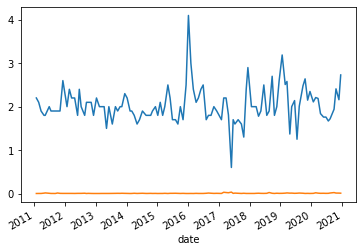

In [22]:
pivoted_df["NO3_N"].plot()
pivoted_df["NO2_N"].plot()

Observations
- We have 76 stations in total from NAWA

# End